In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [2]:
# ignore this

raw_data = {
    'age': [ 68., 70., 56., 60., 68., 64., 62., 64., 64., 60., 58., 52., 50., 62., 58., 74., 60., 58., 62., 56., 62., 66., 50., 66., 52., 58., 58., 62., 64., 76., 56., 52., 58., 54., 56., 70., 60., 68., 70., 66., 50., 70., 66., 68., 74., 66., 46., 62., 64., 64., 70., 80., 52., 60., 60., 60., 58., 52., 52., 70., 72., 52., 76., 54., 60., 66., 48., 70., 60., 64., 66., 60., 56., 60., 64., 54., 56., 58., 60., 66. ],
    'prediabetes_score': [ 53.9 , 69.3 , 41.08, 42.55, 92.22, 42.88, 73.33, 66.29, 82.76, 56.47, 77.55, 46.97, 43.52, 68.78, 54.71, 71.54, 58.63, 50.67, 61.38, 52.06, 51.01, 70.74, 38.  , 60.42, 53.4 , 51.69, 46.58, 53.65, 83.1 , 89.29, 52.76, 40.81, 40.42, 30.15, 19.44, 73.6 , 25.03, 73.84, 67.09, 47.72, 28.51, 92.38, 48.64, 68.95, 67.75, 64.74, 44.99, 29.37, 51.42, 43.38, 80.38, 99.91, 40.31, 40.39, 51.88, 53.52, 32.88, 25.55, 26.99, 70.21, 52.14, 50.49, 78.8 , 41.07, 36.06, 81.74, 32.49, 84.6 , 52.36, 60.72, 56.05, 59.51, 46.98, 61.67, 64.4 , 28.94, 33.39, 55.76, 64.61, 74.72 ],
    'diabetes_score': [ 44.32, 61.85, 31.21, 32.59, 91.43, 33.15, 61.94, 54.37, 78.59, 47.24, 66.8 , 35.89, 33.23, 62.71, 43.64, 59.66, 46.95, 37.88, 49.22, 42.86, 41.77, 59.98, 27.87, 48.56, 39.98, 42.84, 37.53, 43.7 , 68.93, 75.23, 44.45, 30.78, 30.41, 22.21,  6.54, 61.59, 14.2 , 70.34, 54.47, 36.92, 19.28, 84.64, 41.14, 58.17, 63.29, 50.94, 35.11, 19.68, 41.75, 33.38, 66.18, 72.89, 30.36, 30.41, 43.29, 41.93, 22.86, 15.79, 18.7 , 58.19, 41.96, 41.65, 67.08, 30.96, 25.85, 73.24, 22.26, 69.35, 42.2 , 49.77, 45.11, 46.35, 37.5 , 53.36, 60.3 , 19.38, 23.65, 45.1 , 49.62, 60.33 ],
    'psych_trauma_score': [ 14.4 , 13.99, 11.23, 12.73, 15.15, 13.23, 13.14, 13.31, 14.49, 12.37, 12.61, 10.85, 10.23, 12.71, 12.13, 14.87, 12.81, 11.62, 12.74, 11.33, 13.22, 13.8 , 10.12, 13.35, 10.46, 11.96, 11.42, 12.84, 13.86, 15.74, 10.98, 10.13, 11.87, 11.07, 10.65, 15.23, 11.12, 13.84, 14.33, 13.14,  9.54, 15.27, 13.02, 14.23, 15.6 , 14.07,  9.07, 12.49, 13.42, 13.12, 14.55, 16.52,  9.98, 11.87, 12.38, 12.64, 11.72,  9.33, 10.61, 14.28, 14.41, 10.94, 15.97, 10.3 , 12.41, 13.6 ,  9.66, 14.68, 12.14, 13.78, 13.39, 13.05, 11.55, 13.44, 13.4 , 11.07, 11.24, 12.33, 12.47, 13.93 ],
    'bone_density': [ -0.09, -0.47, -1.72, -1.33, -0.32, -0.88, -1.13, -0.76, -0.65, -1.33, -1.49, -2.06, -2.42, -1.08, -1.57,  0.16, -1.39, -1.51, -1.19, -1.67, -1.06, -0.8 , -2.46, -0.61, -2.02, -1.62, -1.58, -1.  , -0.87,  0.71, -1.87, -1.98, -1.46, -1.93, -1.79,  0.17, -1.36, -0.33, -0.08, -0.82, -2.06,  0.18, -0.95, -0.76,  0.73, -0.92, -2.59, -1.02, -0.87, -0.89, -0.47,  0.77, -2.14, -1.26, -1.19, -1.15, -1.5 , -2.39, -1.96, -0.36,  0.1 , -2.66,  0.76, -2.1 , -1.35, -0.27, -2.95, -0.19, -1.33, -0.66, -0.69, -1.35, -1.61, -1.18, -0.73, -1.98, -1.84, -1.5 , -1.34, -0.69 ],
    'alzheimers_risk_score': [ 107.97, 108.45,  63.71,  77.69, 109.86,  90.97,  84.05,  89.16, 95.66,  78.14,  72.04,  48.42,  42.67,  77.71,  67.23, 127.16, 75.78,  72.94,  81.05,  66.38,  81.41,  98.39,  43.9 , 101.28, 48.51,  66.72,  69.69,  86.03,  90.67, 142.11,  61.88,  50.29, 73.53,  52.79,  62.84, 116.16,  71.53, 102.67, 112.51,  93.96, 45.61, 112.59,  95.08, 100.74, 127.73,  97.02,  35.54,  84.79, 92.87,  91.35, 119.35, 150.13,  50.69,  78.48,  75.76,  78.09, 65.28,  47.15,  50.95, 115.31, 119.08,  44.5 , 136.86,  55.89, 77.51,  93.59,  33.64, 117.74,  74.77,  93.37,  97.81,  77.6 , 65.89,  78.89,  88.57,  56.89,  61.05,  72.11,  73.19,  97.55 ],
    'lung_health_score': [ 4.7,  5.8, -1.3,  0.5,  5.1,  2.5,  1.3,  3. ,  3.1,  0.5, -0.3, -3.8, -3.5,  0.7, -0.8,  9.1,  0. , -0.5,  0.9, -1.4,  1.3,  3. , -4.6,  3.5, -3.9, -1. , -0.7,  1.9,  1.7,  9.9, -1.9, -3.1, -0.2, -1.6, -1.4,  5.7,  0.1,  5. ,  5.5,  5.5, -4.2,  7.2,  3.2,  5. , 8.3,  2.9, -8.4,  1.8,  2.4,  2.4,  3.7, 15. , -3.2,  0.8,  0.8, 0.8, -0.8, -4.2, -4.8,  6.1,  7.3, -4. ,  8. , -2.5,  0.2,  3.2, -5.8,  5.2,  0.3,  2.7,  2.8,  0.4, -1.1,  1.3,  2.5, -3.4, -1.4, -0.3,  0.2,  3.9 ]
}

In [3]:
design_matrix = pd.DataFrame(raw_data)

# Problem

A coworker needs your help. They've been trying to fit a linear regression model to a new dataset, but their results have unacceptably high variance. They ask you if you can look at the dataset to try and figure out why.

The variable `design_matrix` includes the independant variables in the dataset, but your coworker doesn't provide you with the corresponding labels.

What's causing the problem? Can you visualize it? Can you quantify it?

## Solution

The data is multicolinear (many of the features are stongly linearly correlated).

### Visualizations

To see linear correlations between two features, you can make a scatter plot. For example, the pandas function 'scatter_matrix' generates one plot for each pair of features:

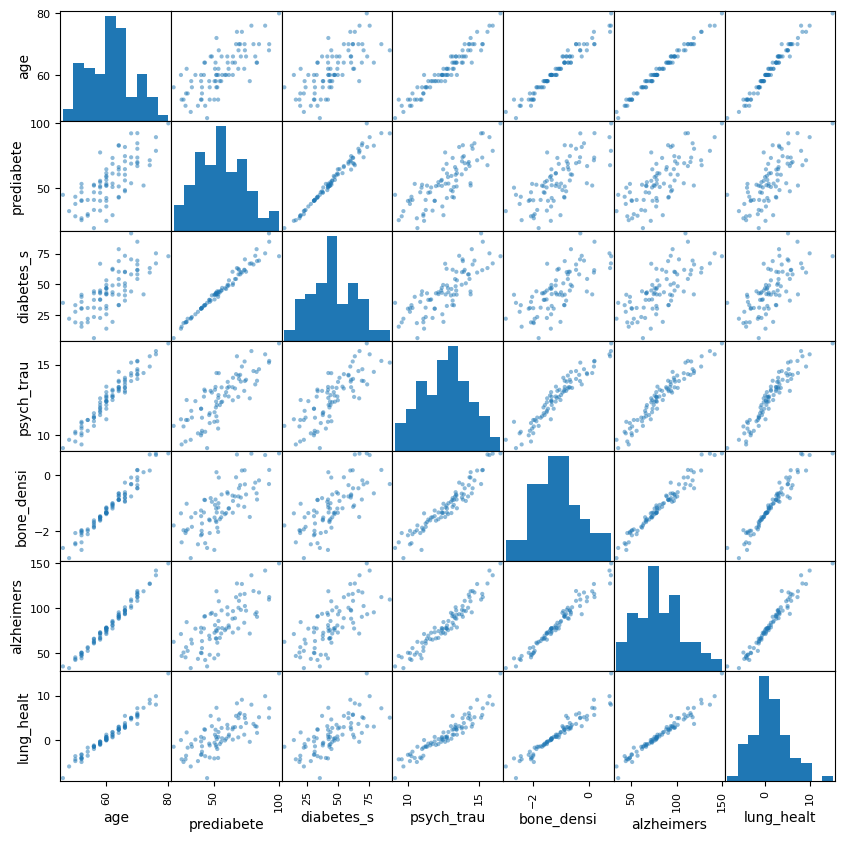

In [4]:
# truncate column names so labels will fit
dm_truncated_names = design_matrix.rename(columns=lambda col_name: col_name[:10])

pd.plotting.scatter_matrix(dm_truncated_names, figsize=(10,10))
plt.show()

### Quantifications

We can show the Pearson correlation coefficients to see how much each pair of features is redundant.

In [5]:
pd.DataFrame(design_matrix).corr()

,age,prediabetes_score,diabetes_score,psych_trauma_score,bone_density,alzheimers_risk_score,lung_health_score
age,1.000000,0.732085,0.707331,0.963246,0.976754,0.993191,0.982317
prediabetes_score,0.732085,1.000000,0.984338,0.810594,0.729779,0.742882,0.718112
diabetes_score,0.707331,0.984338,1.000000,0.795939,0.715245,0.715503,0.687696
psych_trauma_score,0.963246,0.810594,0.795939,1.000000,0.954595,0.963163,0.943720
bone_density,0.976754,0.729779,0.715245,0.954595,1.000000,0.979980,0.962903
alzheimers_risk_score,0.993191,0.742882,0.715503,0.963163,0.979980,1.000000,0.976347
lung_health_score,0.982317,0.718112,0.687696,0.943720,0.962903,0.976347,1.000000


We can also use the variance inflation factor.

In [6]:
# statsmodel can calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# but it expects each row of data for have a 1 to multiply with the first parameter
dm_with_intercept = design_matrix.copy()
dm_with_intercept.insert(0, 'intercept_term', 1)

pd.DataFrame({
    'feature_name': dm_with_intercept.columns,
    'VIF': [
        variance_inflation_factor(dm_with_intercept.values, i)
        for i in range(dm_with_intercept.shape[1])
    ]
})

,feature_name,VIF
0,intercept_term,4892.136060
1,age,109.310641
2,prediabetes_score,42.663203
3,diabetes_score,40.983744
4,psych_trauma_score,22.724130
5,bone_density,30.381454
6,alzheimers_risk_score,98.305655
7,lung_health_score,30.296175
